In [15]:
%matplotlib inline

import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np
import cv2

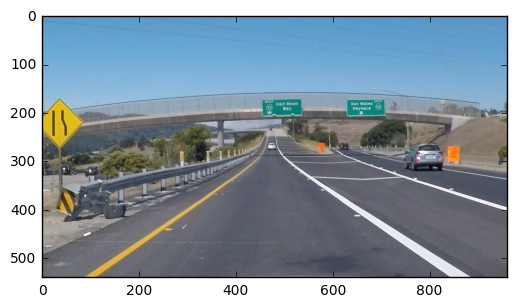

In [59]:
image = cv2.imread("exit-ramp.png", cv2.IMREAD_UNCHANGED)
image = np.dstack((image[:,:,2], image[:,:,1], image[:,:,0]))
plt.imshow(image)

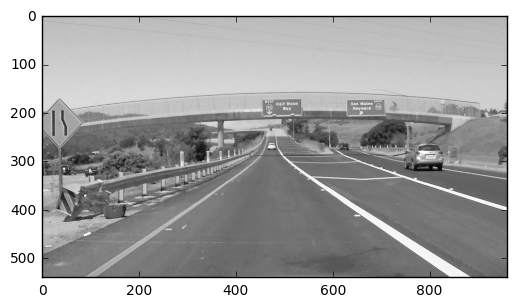

In [60]:
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
plt.imshow(gray, cmap='Greys_r')

In [61]:
kernel_size = 5
gray_blur = cv2.GaussianBlur(gray, (kernel_size, kernel_size), 0)

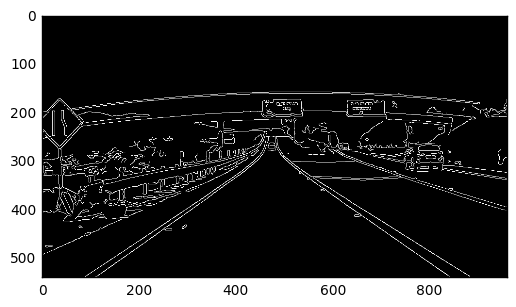

In [62]:
thresholds = {"L":50, "H":150}
edges = cv2.Canny(gray_blur, thresholds["L"], thresholds["H"])
plt.imshow(edges, cmap='Greys_r')

In [132]:
rho = 1
theta = np.pi/180
threshold = 100
min_line_length = 250
max_line_gap = 15
# Create a blank image to draw lines on
line_image = np.copy(image)*0 

In [133]:
lines = cv2.HoughLinesP(edges, rho, theta, threshold, np.array([]), 
                        min_line_length, max_line_gap)

for line in lines:
    for x1,y1,x2,y2 in line:
        cv2.line(line_image, (x1,y1), (x2,y2), (255,0,0), 10)

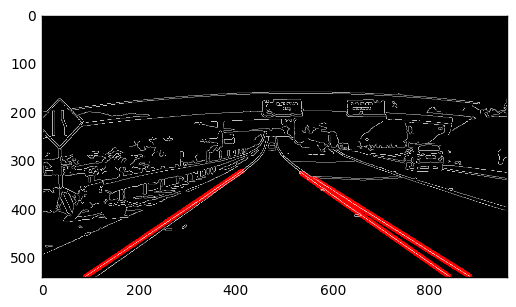

In [134]:
color_edges = np.dstack((edges, edges, edges))
combo = cv2.addWeighted(color_edges, 0.8, line_image, 1, 0)
plt.imshow(combo)